In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank = pd.read_csv('bank.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


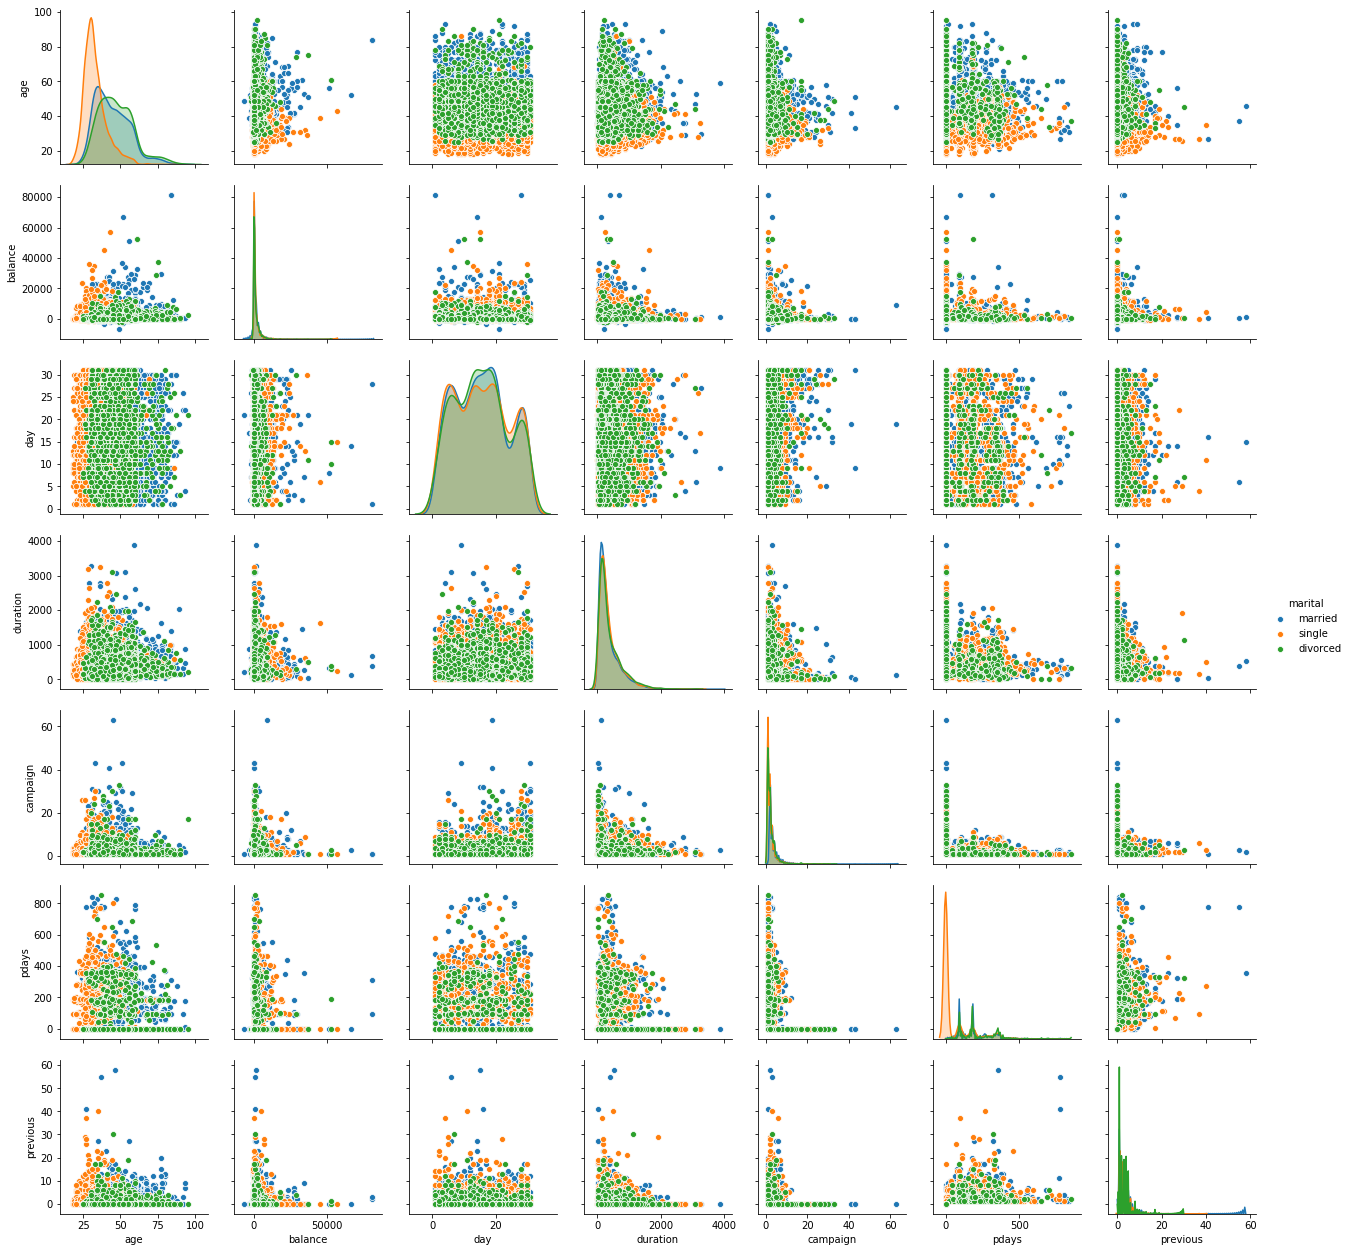

In [6]:
sns.pairplot(bank,hue='marital')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


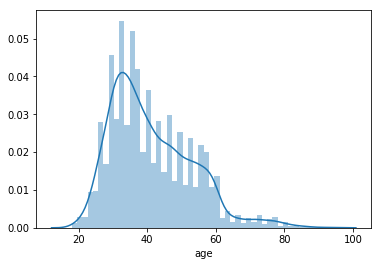

In [7]:
sns.distplot(bank['age'])

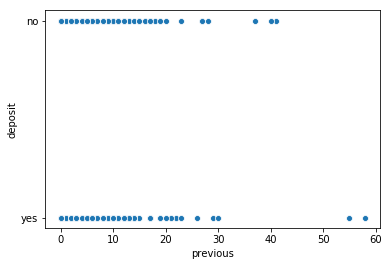

In [8]:
sns.scatterplot(x=bank['previous'],y=bank['deposit'])

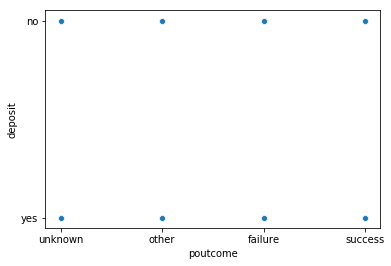

In [9]:
sns.scatterplot(x=bank['poutcome'],y=bank['deposit'])

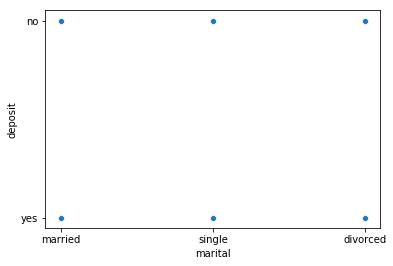

In [10]:
sns.scatterplot(x=bank['marital'],y=bank['deposit'])

In [13]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
bank['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [15]:
sns.set_style('whitegrid')

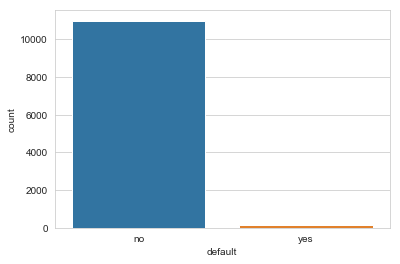

In [16]:
sns.countplot(x=bank['default'],data=bank)

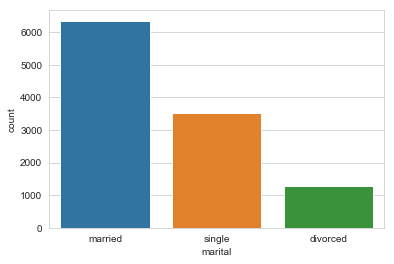

In [17]:
sns.countplot(bank['marital'],data=bank)

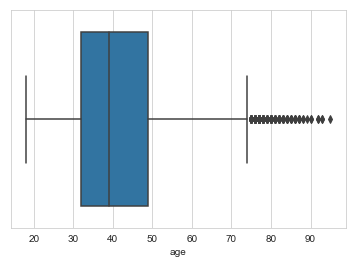

In [18]:
sns.boxplot(x=bank['age'],data=bank)

In [21]:
married = pd.get_dummies(bank['marital'],drop_first=True)

In [40]:
defaults = pd.get_dummies(bank['default'],drop_first=True)
defaults.rename(columns={'yes':'defaults'},inplace=True)

In [43]:
loans = pd.get_dummies(bank['loan'],drop_first=True)
loans.rename(columns={'yes':'loans'},inplace=True)

In [44]:
housings = pd.get_dummies(bank['housing'],drop_first=True)
housings.rename(columns={'yes':'housings'},inplace=True)

In [45]:
bank = pd.concat([bank,defaults,loans,housings],axis=1)

In [47]:
bank.drop(['yes','yes','yes'],axis=1,inplace=True)

In [49]:
bank.drop(['marital','default','housing'],axis=1,inplace=True)

In [51]:
bank['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24,  1, 10, 22, 25, 31],
      dtype=int64)

In [52]:
bank['duration'].unique()

array([1042, 1467, 1389, ..., 1504,  818, 1812], dtype=int64)

In [58]:
job = pd.get_dummies(bank['job'])

In [60]:
bank['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [66]:
edu = pd.get_dummies(bank['education'])

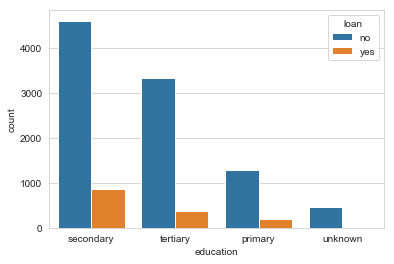

In [68]:
sns.countplot(bank['education'],hue='loan',data=bank)

In [69]:
bank = pd.concat([bank,edu['secondary'],edu['tertiary']],axis=1)

In [72]:
bank.drop(['education'],axis=1,inplace=True)

In [74]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [76]:
contact = pd.get_dummies(bank['contact'])

In [79]:
bank.drop(['loan','month','job'],axis=1,inplace=True)

In [83]:
bank = pd.concat([bank,job['admin.'],contact['unknown']],axis=1)

In [86]:
bank.drop(['contact'],axis=1,inplace=True)

In [88]:
previous = pd.get_dummies(bank['poutcome'])

In [92]:
previous.head()

,failure,other,success,unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [93]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,poutcome,deposit,married,single,defaults,loans,housings,secondary,tertiary,admin.,unknown
0,59,2343,5,1042,1,-1,0,unknown,yes,1,0,0,0,1,1,0,1,1
1,56,45,5,1467,1,-1,0,unknown,yes,1,0,0,0,0,1,0,1,1
2,41,1270,5,1389,1,-1,0,unknown,yes,1,0,0,0,1,1,0,0,1
3,55,2476,5,579,1,-1,0,unknown,yes,1,0,0,0,1,1,0,0,1
4,54,184,5,673,2,-1,0,unknown,yes,1,0,0,0,0,0,1,1,1


In [97]:
bank = pd.concat([bank,previous['unknown']],axis=1)

In [99]:
bank.drop(['poutcome'],axis=1,inplace=True)

In [100]:
from sklearn.cross_validation import train_test_split

In [101]:
X = bank.drop(['deposit'],axis=1)
y = bank['deposit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,married,single,defaults,loans,housings,secondary,tertiary,admin.,unknown,success,unknown
3955,28,5741,10,1042,5,200,3,0,1,0,0,0,0,1,0,0,0,0
11150,34,355,21,314,3,-1,0,1,0,0,0,0,1,0,0,0,0,1
5173,48,201,10,594,1,91,1,0,0,0,0,0,1,0,0,0,1,0
3017,53,1961,15,351,1,-1,0,1,0,0,0,0,0,1,0,0,0,1
2910,53,1624,11,166,3,97,7,1,0,0,0,0,0,1,0,0,1,0


In [104]:
y_train.head()

3955     yes
11150     no
5173     yes
3017     yes
2910     yes
Name: deposit, dtype: object

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
bank_model = LogisticRegression()

In [107]:
bank_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
bank_model.intercept_

array([-0.81973833])

In [109]:
bank_model.coef_

array([[ 1.93854896e-03,  2.59093510e-05, -6.55593094e-03,
         5.22483003e-03, -1.17234617e-01, -1.25429604e-04,
         1.55730066e-02, -2.50948435e-01,  6.39767096e-02,
        -2.54642189e-01, -6.74924781e-01, -8.81804801e-01,
         1.07216587e-01,  3.68239703e-01,  2.86323186e-01,
        -1.35162259e+00,  2.11488779e+00, -4.74462592e-01]])

In [112]:
predictions = bank_model.predict(X_test)

In [113]:
predictions

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[974 192]
 [268 799]]


             precision    recall  f1-score   support

         no       0.78      0.84      0.81      1166
        yes       0.81      0.75      0.78      1067

avg / total       0.79      0.79      0.79      2233



In [132]:
submission = pd.DataFrame(data=predictions,index=X_test['age'],columns=['true'])

In [133]:
submission.head()

,true
age,
65,no
38,yes
35,yes
47,yes
35,no


In [134]:
submission['predicted'] = predictions

In [135]:
submission.head()

,true,predicted
age,,
65,no,no
38,yes,yes
35,yes,yes
47,yes,yes
35,no,no


In [136]:
submission.to_csv("bank_submission.csv")

In [139]:
new = bank.drop(['deposit'],axis=1)
new_y = bank['deposit']
new_predictions = bank_model.predict(new)

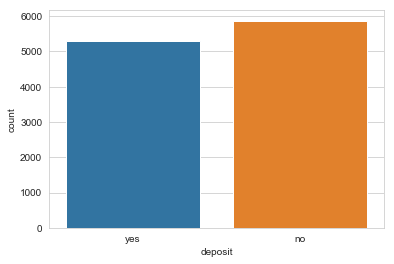

In [141]:
sns.countplot(x=new_y)

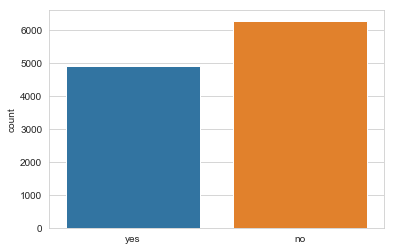

In [142]:
sns.countplot(x=new_predictions)

In [145]:
from sklearn.externals import joblib

In [146]:
joblib.dump(bank_model,"bank_model.pkl")

['bank_model.pkl']